# ТРАНСКРИПТОМИКА  (Июль 2021 г.)
---

## ПРАКТИКА 2. Количественная оценка экспрессии транскриптов

2.1. Загрузка и анализ данных<br>
2.2. Объединение образцов в единый data-set (Summarized Experiment)<br>
2.3. Дифференциальное выражение числа посчитанных транскриптов<br>
2.4. Преобразование, стабилизирующее дисперсию<br>
2.5. Расчет дистанций между образцами<br>

---

## 2.1. Загрузка и анализ данных

Перепишите настояющую практику, включая директории **quants** и файл **sample_table.csv** в свою директорию

Укажите путь к этой директории

In [4]:
dir <- '/home/kolchina/practice_2_Transcriptomics/'

Вывод списка директорий с результатами оценки экспрессии 

In [5]:
list.files(file.path(dir, "quants"))

[1] "SRR1039508" "SRR1039509" "SRR1039512" "SRR1039513" "SRR1039516"
[6] "SRR1039517" "SRR1039520" "SRR1039521"

Вывод таблицы с информацией по каждому образцу

In [6]:
csvfile <- file.path(dir, "sample_table.csv")
coldata <- read.csv(csvfile, row.names=1, stringsAsFactors=FALSE)
coldata

,SampleName,cell,dex,albut,Run,avgLength,Experiment,Sample,BioSample
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
SRR1039508,GSM1275862,N61311,untrt,untrt,SRR1039508,126,SRX384345,SRS508568,SAMN02422669
SRR1039509,GSM1275863,N61311,trt,untrt,SRR1039509,126,SRX384346,SRS508567,SAMN02422675
SRR1039512,GSM1275866,N052611,untrt,untrt,SRR1039512,126,SRX384349,SRS508571,SAMN02422678
SRR1039513,GSM1275867,N052611,trt,untrt,SRR1039513,87,SRX384350,SRS508572,SAMN02422670
SRR1039516,GSM1275870,N080611,untrt,untrt,SRR1039516,120,SRX384353,SRS508575,SAMN02422682
SRR1039517,GSM1275871,N080611,trt,untrt,SRR1039517,126,SRX384354,SRS508576,SAMN02422673
SRR1039520,GSM1275874,N061011,untrt,untrt,SRR1039520,101,SRX384357,SRS508579,SAMN02422683
SRR1039521,GSM1275875,N061011,trt,untrt,SRR1039521,98,SRX384358,SRS508580,SAMN02422677


Привязка путей файлов quant.sf к списку образцов

In [7]:
coldata <- coldata[1:8,]
coldata$names <- coldata$Run
coldata$files <- file.path(dir, "quants", coldata$names, "quant.sf")
file.exists(coldata$files)
coldata

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

,SampleName,cell,dex,albut,Run,avgLength,Experiment,Sample,BioSample,names,files
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR1039508,GSM1275862,N61311,untrt,untrt,SRR1039508,126,SRX384345,SRS508568,SAMN02422669,SRR1039508,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039508/quant.sf
SRR1039509,GSM1275863,N61311,trt,untrt,SRR1039509,126,SRX384346,SRS508567,SAMN02422675,SRR1039509,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039509/quant.sf
SRR1039512,GSM1275866,N052611,untrt,untrt,SRR1039512,126,SRX384349,SRS508571,SAMN02422678,SRR1039512,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039512/quant.sf
SRR1039513,GSM1275867,N052611,trt,untrt,SRR1039513,87,SRX384350,SRS508572,SAMN02422670,SRR1039513,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039513/quant.sf
SRR1039516,GSM1275870,N080611,untrt,untrt,SRR1039516,120,SRX384353,SRS508575,SAMN02422682,SRR1039516,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039516/quant.sf
SRR1039517,GSM1275871,N080611,trt,untrt,SRR1039517,126,SRX384354,SRS508576,SAMN02422673,SRR1039517,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039517/quant.sf
SRR1039520,GSM1275874,N061011,untrt,untrt,SRR1039520,101,SRX384357,SRS508579,SAMN02422683,SRR1039520,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039520/quant.sf
SRR1039521,GSM1275875,N061011,trt,untrt,SRR1039521,98,SRX384358,SRS508580,SAMN02422677,SRR1039521,/home/kolchina/practice_2_Transcriptomics//quants/SRR1039521/quant.sf


---

## 2.2. Объединение образцов в единый data-set (Summarized Experiment)

Объединение все анализов в единый data-set<br/>
Библиотека tximeta автоматически найдет и загрузит аннотацию транскриптома используя файлы **quant.sf**

In [8]:
library("tximeta")
library("DESeq2")
se <- tximeta(coldata)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

### Структура полученного data-set отображена на рисунке:

<img src="se.svg" width="800" height="800" style="float:center"/>

Проверка размеров полученного data-set и состава транскриптов (Ensembl Transcipts) 

In [9]:
dim(se)
head(rownames(se),30)

[1] 236186      8

[1] "ENST00000456328.2" "ENST00000450305.2" "ENST00000488147.1"
 [4] "ENST00000619216.1" "ENST00000473358.1" "ENST00000469289.1"
 [7] "ENST00000607096.1" "ENST00000417324.1" "ENST00000461467.1"
[10] "ENST00000606857.1" "ENST00000642116.1" "ENST00000492842.2"
[13] "ENST00000641515.2" "ENST00000466430.5" "ENST00000477740.5"
[16] "ENST00000471248.1" "ENST00000610542.1" "ENST00000453576.2"
[19] "ENST00000495576.1" "ENST00000442987.3" "ENST00000494149.2"
[22] "ENST00000595919.1" "ENST00000493797.1" "ENST00000484859.1"
[25] "ENST00000490997.5" "ENST00000466557.6" "ENST00000662089.1"
[28] "ENST00000491962.1" "ENST00000655252.1" "ENST00000410691.1"

Перевод количественных оценок на уровне транскриптов до уровня генов с помощью команды summarizeToGene библиотеки tximport<br/>
Таблица сопоставления транскриптов с генами создается автоматически на основе метаданных, хранящихся в объекте se.

In [10]:
gse <- summarizeToGene(se)

loading existing TxDb created: 2021-07-08 07:34:10

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

obtaining transcript-to-gene mapping from database

generating gene ranges

summarizing abundance

summarizing counts

summarizing length

summarizing inferential replicates



* Проверка размеров и состава массива данных (Ensembl Genes)<br/>
* Обратите внимание, что имена транскриптов (ENST) поменялись на названия генов (ENSG)<br/>

In [11]:
dim(gse)
head(rownames(gse),n=30)

[1] 60230     8

[1] "ENSG00000000003.15" "ENSG00000000005.6"  "ENSG00000000419.14"
 [4] "ENSG00000000457.14" "ENSG00000000460.17" "ENSG00000000938.13"
 [7] "ENSG00000000971.16" "ENSG00000001036.14" "ENSG00000001084.13"
[10] "ENSG00000001167.15" "ENSG00000001460.18" "ENSG00000001461.17"
[13] "ENSG00000001497.18" "ENSG00000001561.7"  "ENSG00000001617.12"
[16] "ENSG00000001626.16" "ENSG00000001629.10" "ENSG00000001630.17"
[19] "ENSG00000001631.16" "ENSG00000002016.18" "ENSG00000002079.14"
[22] "ENSG00000002330.14" "ENSG00000002549.13" "ENSG00000002586.20"
[25] "ENSG00000002587.10" "ENSG00000002726.21" "ENSG00000002745.13"
[28] "ENSG00000002746.15" "ENSG00000002822.16" "ENSG00000002834.18"

Вывод таблиц, содержащих данные по числу ридов (counts) и TPM (abundance) по каждому гену

In [12]:
head(assays(gse)$counts, 10)
head(assays(gse)$abundance, 10)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,714.111,471.211,903.464,429.861,1191.813,1090.276,808.583,605.178
ENSG00000000005.6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000000419.14,530.723,581.866,706.762,394.358,679.766,915.521,483.556,567.854
ENSG00000000457.14,312.874,275.916,366.211,223.503,365.588,440.189,305.453,284.126
ENSG00000000460.17,92.715,76.940,55.737,45.654,112.044,101.361,97.354,87.781
ENSG00000000938.13,0.000,0.000,2.000,0.000,1.000,0.000,0.000,0.000
ENSG00000000971.16,3271.995,3702.928,6187.010,4262.304,6728.225,11017.693,5170.295,7962.092
ENSG00000001036.14,2319.594,1645.067,2692.234,1370.774,2222.524,2221.220,2134.995,1748.657
ENSG00000001084.13,554.133,401.891,643.052,527.572,886.350,769.349,730.079,752.772
ENSG00000001167.15,508.000,321.000,582.256,228.902,822.528,723.855,458.307,340.021


,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,17.868504,11.054294,16.437001,11.44215,19.771290,17.061442,21.815879,13.606522
ENSG00000000005.6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.14,34.892738,42.995142,36.921551,33.94698,35.152610,40.962723,35.895818,40.931915
ENSG00000000457.14,5.719496,4.513575,4.728233,5.01793,4.155483,5.022255,5.992172,5.648252
ENSG00000000460.17,2.104607,2.314616,1.112925,1.55924,2.051491,1.198944,2.528832,1.659767
ENSG00000000938.13,0.000000,0.000000,0.049853,0.00000,0.091533,0.000000,0.000000,0.000000
ENSG00000000971.16,61.392955,76.895422,87.670081,100.72903,93.346936,135.122672,106.465205,154.999168
ENSG00000001036.14,67.340304,52.950251,60.190391,51.46184,48.906473,44.108778,69.117901,53.916937
ENSG00000001084.13,13.747590,9.641202,11.092719,14.62703,16.310508,12.441335,20.567617,17.244353
ENSG00000001167.15,7.160682,5.502957,7.230890,3.88946,10.095551,7.773137,7.963451,5.173798


Суммарное число ридов (в млн) для каждого образца

In [13]:
round(colSums(assay(gse)) / 1e6, 1 )

SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516 SRR1039517 SRR1039520 
      21.5       19.7       26.6       16.0       25.7       32.4       20.0 
SRR1039521 
      22.2

* Краткая информация о референсном геноме (Число хромосом, их длина, структура и используемая сборка генома)<br/>
* Расположение транскриптов в геноме

In [14]:
seqinfo(rowRanges(gse))
rowRanges(gse)

Seqinfo object with 25 sequences (1 circular) from hg38 genome:
  seqnames seqlengths isCircular genome
  chr1      248956422      FALSE   hg38
  chr2      242193529      FALSE   hg38
  chr3      198295559      FALSE   hg38
  chr4      190214555      FALSE   hg38
  chr5      181538259      FALSE   hg38
  ...             ...        ...    ...
  chr21      46709983      FALSE   hg38
  chr22      50818468      FALSE   hg38
  chrX      156040895      FALSE   hg38
  chrY       57227415      FALSE   hg38
  chrM          16569       TRUE   hg38

GRanges object with 60230 ranges and 2 metadata columns:
                     seqnames              ranges strand |            gene_id
                        <Rle>           <IRanges>  <Rle> |        <character>
  ENSG00000000003.15     chrX 100627108-100639991      - | ENSG00000000003.15
   ENSG00000000005.6     chrX 100584936-100599885      + |  ENSG00000000005.6
  ENSG00000000419.14    chr20   50934867-50959140      - | ENSG00000000419.14
  ENSG00000000457.14     chr1 169849631-169894267      - | ENSG00000000457.14
  ENSG00000000460.17     chr1 169662007-169854080      + | ENSG00000000460.17
                 ...      ...                 ...    ... .                ...
   ENSG00000288721.1     chr6   41793314-41921139      - |  ENSG00000288721.1
   ENSG00000288722.1     chrX 154886355-154888061      + |  ENSG00000288722.1
   ENSG00000288723.1     chr1 241722926-241848128      - |  ENSG00000288723.1
   ENSG00000288724.1     chr3   46284775-46293795      - |  ENSG00000288724.1
   ENSG

### Задание № 1:

1) Какой класс объекта gse?
2) Какая средняя длина (length) всех генов для каждого образца? (воспользуйтесь функцией colMeans)
3) Какова длина 13 хромосомы генома hg38?
3) Сколько в среднем изоформ транскриптов соответствует одному гену?

**Ответы:**

1) Определим класс объекта:

In [15]:
typeof(gse)
class(gse)
gse

[1] "S4"

[1] "RangedSummarizedExperiment"
attr(,"package")
[1] "SummarizedExperiment"

class: RangedSummarizedExperiment 
dim: 60230 8 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(23): counts abundance ... infRep19 infRep20
rownames(60230): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288724.1 ENSG00000288725.1
rowData names(2): gene_id tx_ids
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(10): SampleName cell ... BioSample names

Т.е. класс объекта - RangedSummarizedExperiment.

2) Рассчитаем среднюю длину генов для каждого образца:

In [16]:
colMeans(assays(gse)$length)

SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516 SRR1039517 SRR1039520 
  1345.699   1348.241   1329.155   1367.358   1331.996   1334.774   1346.728 
SRR1039521 
  1348.507

3) Теперь узнаем длину 13 хромосомы генома hg38:

In [17]:
seqlengths(seqinfo(rowRanges(gse)))

chr1      chr2      chr3      chr4      chr5      chr6      chr7      chr8 
248956422 242193529 198295559 190214555 181538259 170805979 159345973 145138636 
     chr9     chr10     chr11     chr12     chr13     chr14     chr15     chr16 
138394717 133797422 135086622 133275309 114364328 107043718 101991189  90338345 
    chr17     chr18     chr19     chr20     chr21     chr22      chrX      chrY 
 83257441  80373285  58617616  64444167  46709983  50818468 156040895  57227415 
     chrM 
    16569

Следовательно, длина 13 хромосомы равна 114364328.

4) Посчитаем среднее число изоформ транскриптов:

In [18]:
nrow(se)/nrow(gse)

[1] 3.921401

Т.е. это число транскриптов на число генов.

---

## 2.3. Дифференциальное выражение числа посчитанных транскриптов

Существует множество программ для дифференциального выражения числа посчитанных транскриптов. Мы предлагаем использовать DESeq2, программу, подходящую для оценки дифференциальной экспрессии при небольших значениях TPM с большим динамическим диапазоном и возможным наличием выбросов. Она позволяет получить стабильные и интерпретируемые оценки. Для этого необходимо подготовить массив для анализа и формирования DESeqDataSet (dds). <br/>
В качестве вывода будет показано число генов, используемых в анализе:

In [19]:
library("DESeq2")
library("tximeta")

dds <- DESeqDataSet(gse, design = ~ cell + dex)
nrow(dds)

using counts and average transcript lengths from tximeta

Warning message in DESeqDataSet(gse, design = ~cell + dex):
"some variables in design formula are characters, converting to factors"


[1] 60230

Далее массив данных необходимо отфильтровать - удалить строки в которых нет подсчетов или только один подсчет для всех выборок<br/>
В данном случае приведена фильтрация с сохранением тех генов, которые имеют ненулевые значения числа ридов по крайней мере для трех образцов, которые имеют как минимум 10 прочтений<br/>
Будет выведено финальное число используемых в анализе генов

In [20]:
keep <- rowSums(counts(dds) >= 10) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 17920

Сравните результаты экспрессии генов (TPM) массива данных dds с gse

In [21]:
head(assays(gse)$abundance, 10)
head(assays(dds)$abundance, 10)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,17.868504,11.054294,16.437001,11.44215,19.771290,17.061442,21.815879,13.606522
ENSG00000000005.6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.14,34.892738,42.995142,36.921551,33.94698,35.152610,40.962723,35.895818,40.931915
ENSG00000000457.14,5.719496,4.513575,4.728233,5.01793,4.155483,5.022255,5.992172,5.648252
ENSG00000000460.17,2.104607,2.314616,1.112925,1.55924,2.051491,1.198944,2.528832,1.659767
ENSG00000000938.13,0.000000,0.000000,0.049853,0.00000,0.091533,0.000000,0.000000,0.000000
ENSG00000000971.16,61.392955,76.895422,87.670081,100.72903,93.346936,135.122672,106.465205,154.999168
ENSG00000001036.14,67.340304,52.950251,60.190391,51.46184,48.906473,44.108778,69.117901,53.916937
ENSG00000001084.13,13.747590,9.641202,11.092719,14.62703,16.310508,12.441335,20.567617,17.244353
ENSG00000001167.15,7.160682,5.502957,7.230890,3.88946,10.095551,7.773137,7.963451,5.173798


,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,17.868504,11.054294,16.437001,11.442150,19.771290,17.061442,21.815879,13.606522
ENSG00000000419.14,34.892738,42.995142,36.921551,33.946977,35.152610,40.962723,35.895818,40.931915
ENSG00000000457.14,5.719496,4.513575,4.728233,5.017930,4.155483,5.022255,5.992172,5.648252
ENSG00000000460.17,2.104607,2.314616,1.112925,1.559240,2.051491,1.198944,2.528832,1.659767
ENSG00000000971.16,61.392955,76.895422,87.670081,100.729032,93.346936,135.122672,106.465205,154.999168
ENSG00000001036.14,67.340304,52.950251,60.190391,51.461838,48.906473,44.108778,69.117901,53.916937
ENSG00000001084.13,13.747590,9.641202,11.092719,14.627034,16.310508,12.441335,20.567617,17.244353
ENSG00000001167.15,7.160682,5.502957,7.230890,3.889460,10.095551,7.773137,7.963451,5.173798
ENSG00000001460.18,4.000052,4.502690,4.846361,3.853038,4.504803,3.654828,4.265440,4.489864
ENSG00000001461.17,25.334031,24.744607,47.563938,43.202620,25.979754,22.614431,33.702901,37.546010


### Задание № 2:

1) Чем отличаются массивы данных gse от dds
2) Как изменилось среднее число ридов на один ген в dds массиве?

**Ответы:**

1) Удалились строки с нулевыми значениями (фильтрация с сохранением тех генов, которые имеют ненулевые значения числа ридов по крайней мере для трех образцов, которые имеют как минимум 10 прочтений).

2) Посчитаем среднее по всем генам в dds и gse и посмотрим разницу:

In [35]:
mean(rowMeans(assays(dds)$counts))-mean(rowMeans(assays(gse)$counts))

[1] 899.274

Оно увеличилось, что в общем-то логично, см. пункт 1.

---

## 2.4. Преобразование, стабилизирующее дисперсию

Cтатистические методы анализа многомерных данных, например кластеризация и анализ главных компонент (PCA), лучше всего подходят для данных, которые имеют одинаковый диапазон дисперсии в разных диапазонах средних значений (гомоскедастичность). Однако, для подсчетов RNA-seq ожидаемая дисперсия растет вместе со средним значением. Например, если выполнить PCA непосредственно на матрице нормализованных подсчетов (с поправкой на различия в глубине секвенирования), результирующий график будет зависеть в основном от генов с наибольшим покрытием, поскольку они показывают наибольшие абсолютные различия между образцами.
Для примера, приведем график зависимости стандартного отклонения от средних значений:

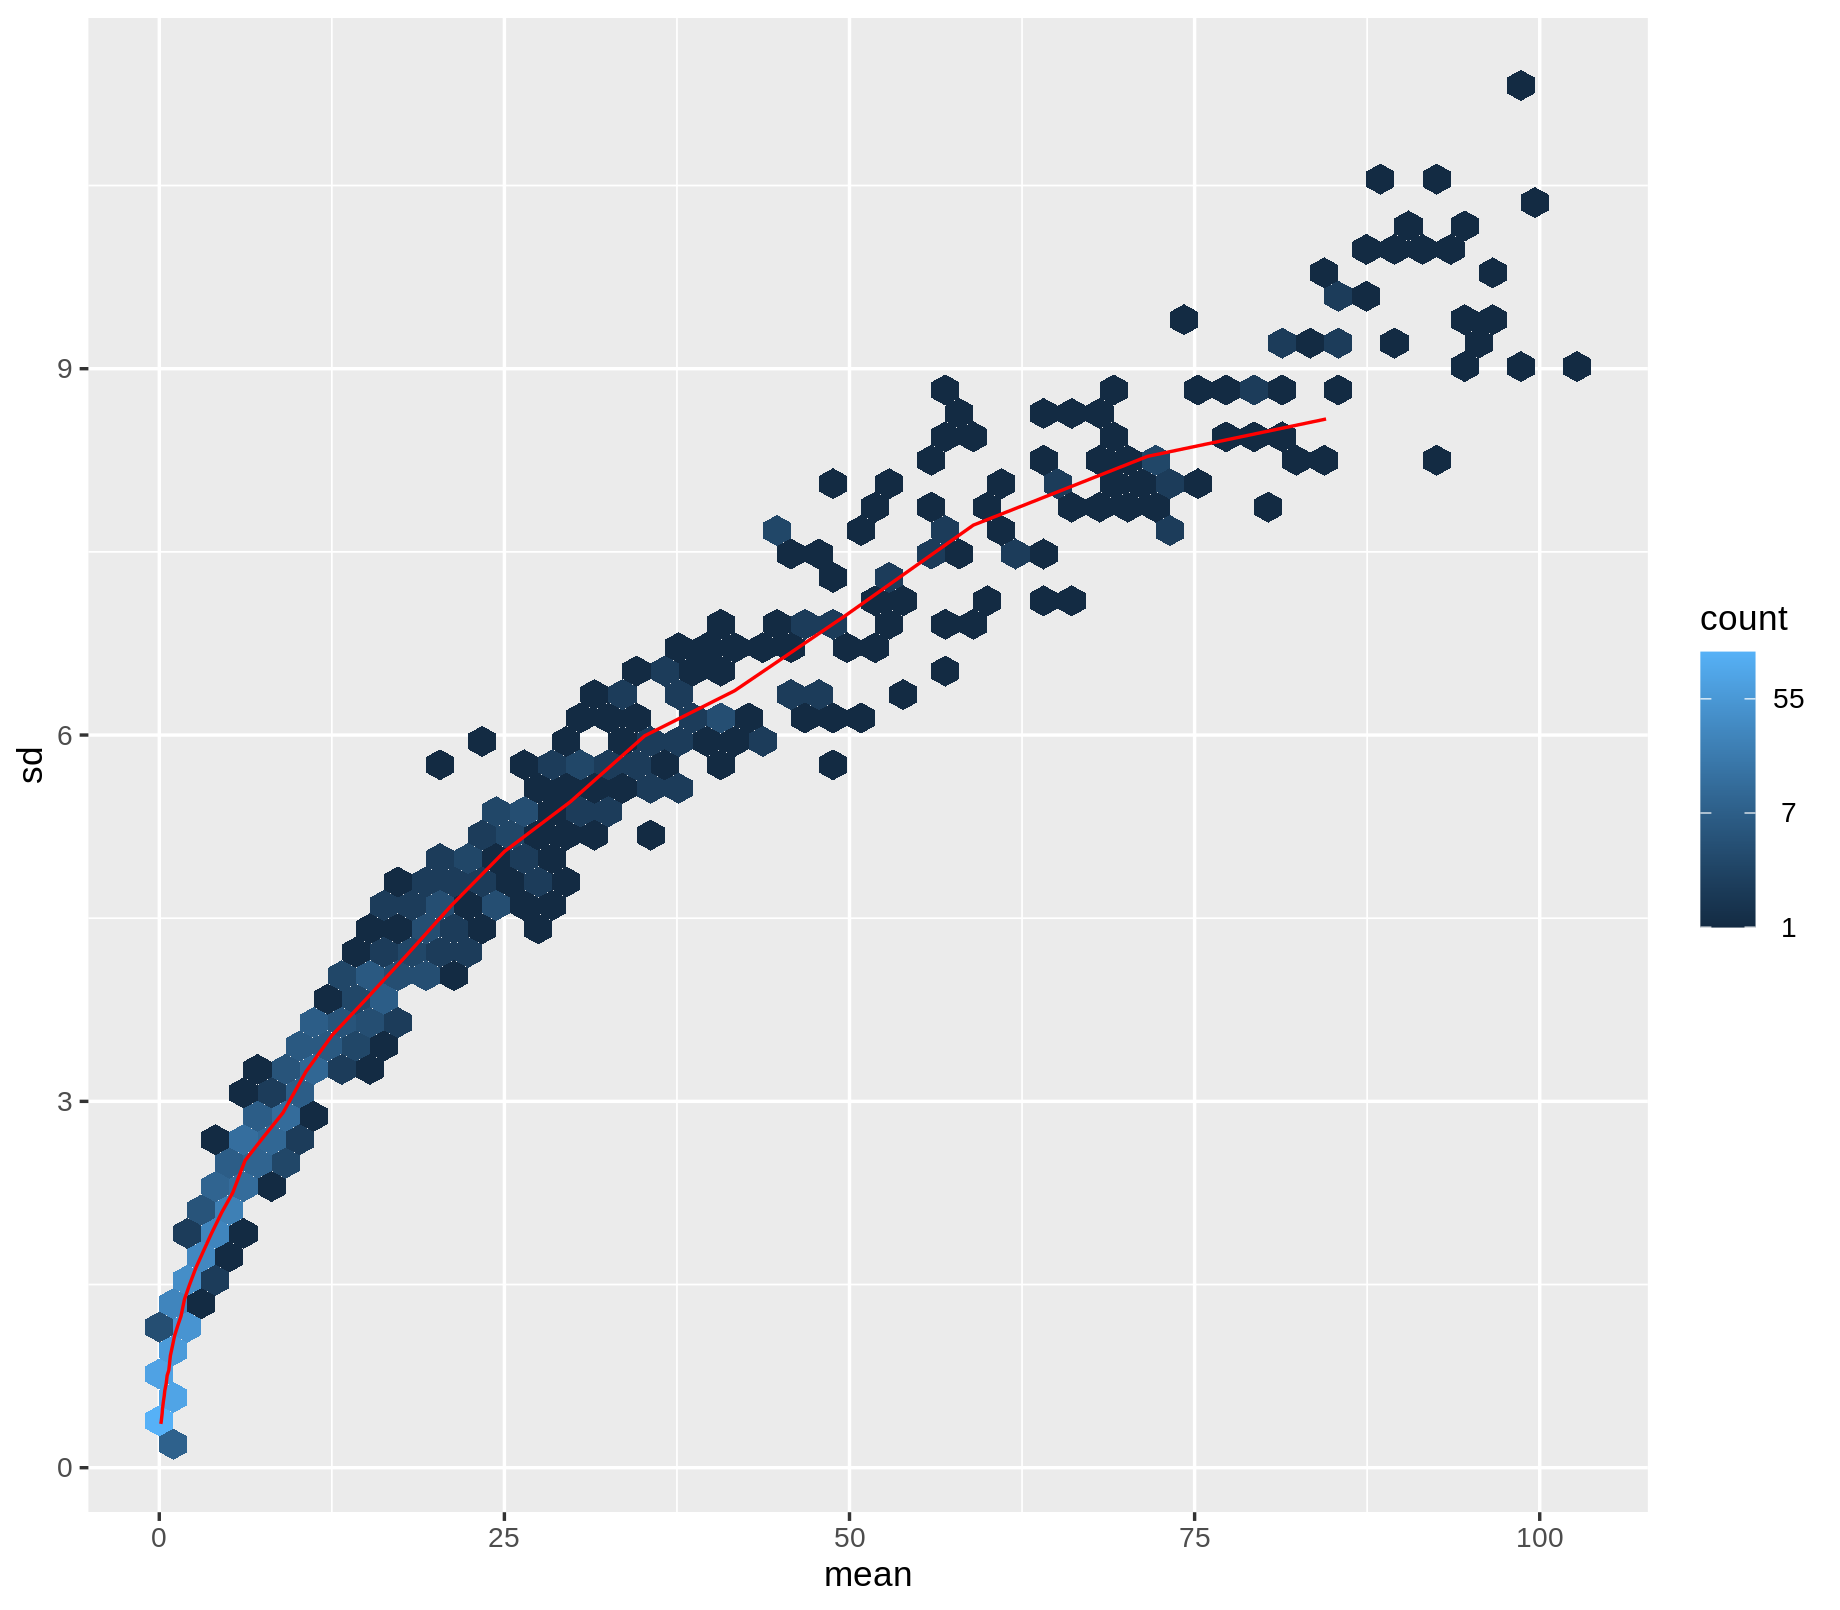

In [36]:
options(repr.plot.width=8, repr.plot.height=7, repr.plot.res=230, repr.plot.pointsize=15, repr.plot.quality=100)
lambda <- 10^seq(from = -1, to = 2, length = 1000)
cts <- matrix(rpois(1000*100, lambda), ncol = 100)
library("vsn")
meanSdPlot(cts, ranks = FALSE)

Стандартная практика для избегания увеличения дисперсии - логарифмирование нормализованных значений. Тогда гены с самыми низкими значениями покрытия будут вносить вклад в результирующий график, потому что логарифм малых значений фактически увеличивает их дисперсию. Логарифмировав значения, построим график зависимости стандартного отклонения  от средних значений:

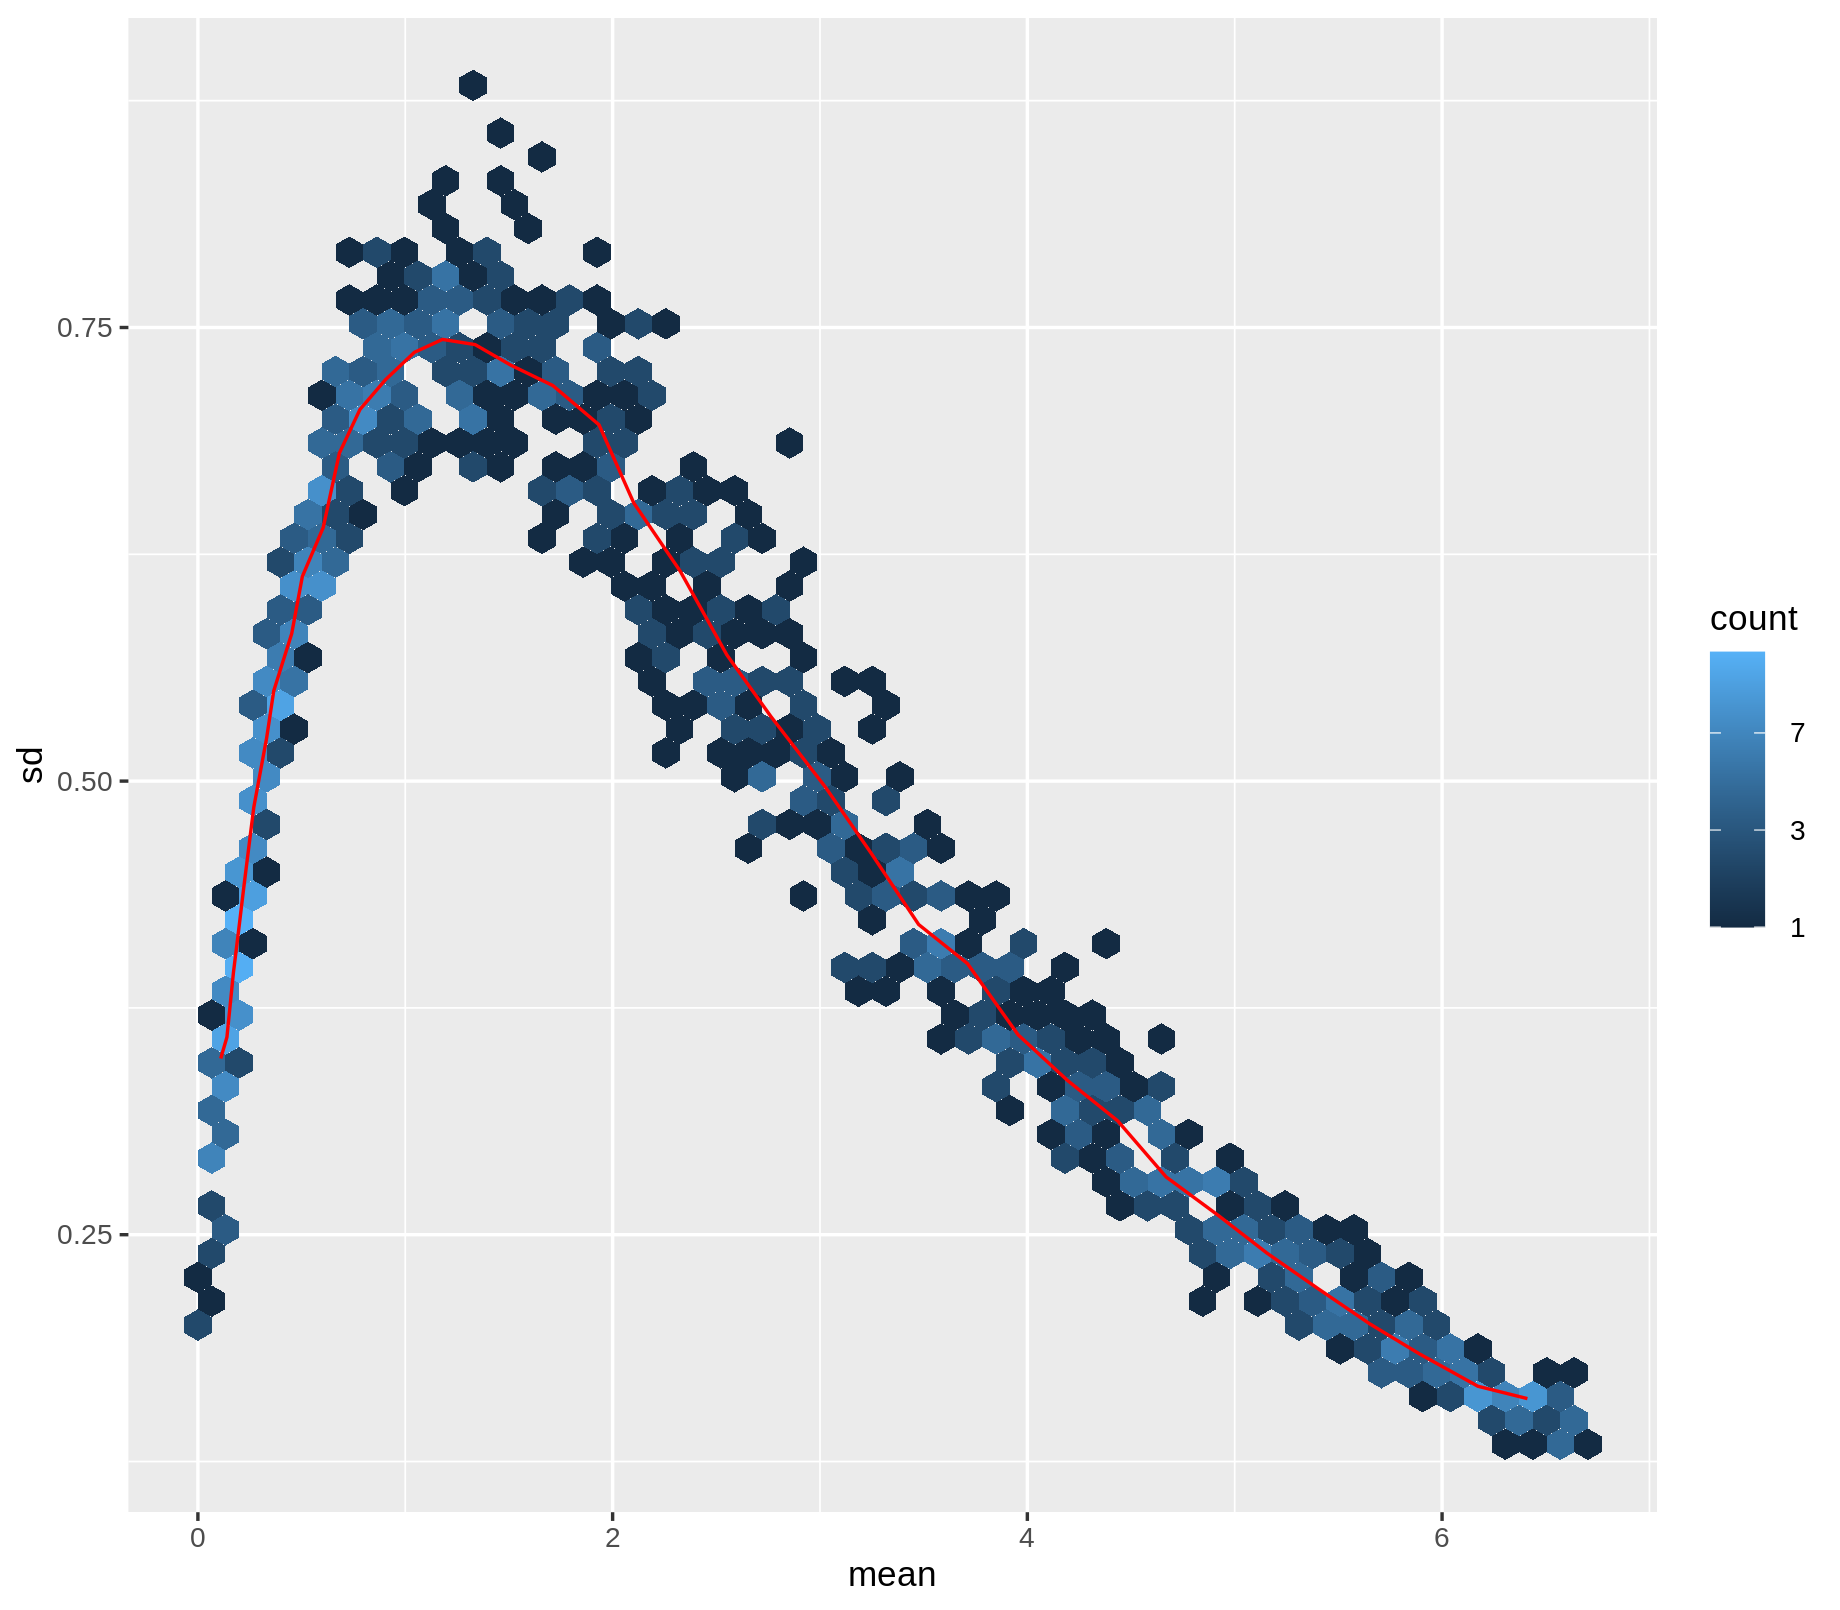

In [37]:
log.cts.one <- log2(cts + 1)
meanSdPlot(log.cts.one, ranks = FALSE)

Однако, в этом случае, логарифм для значений близких к нулю значительно увеличивают дисперсию, так что гены с низким числом прочтений будут вносить чрезмерный вклад в расстояния между образцами и графики PCA.

Используя нормализацию методом логарифмирования log2(x + 1) для данных dds, распределение точек в поле главный компонент имеет вид:


Attaching package: 'dplyr'


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"`as_data_frame()` was deprecated in tibble 2.0.0.
Please 

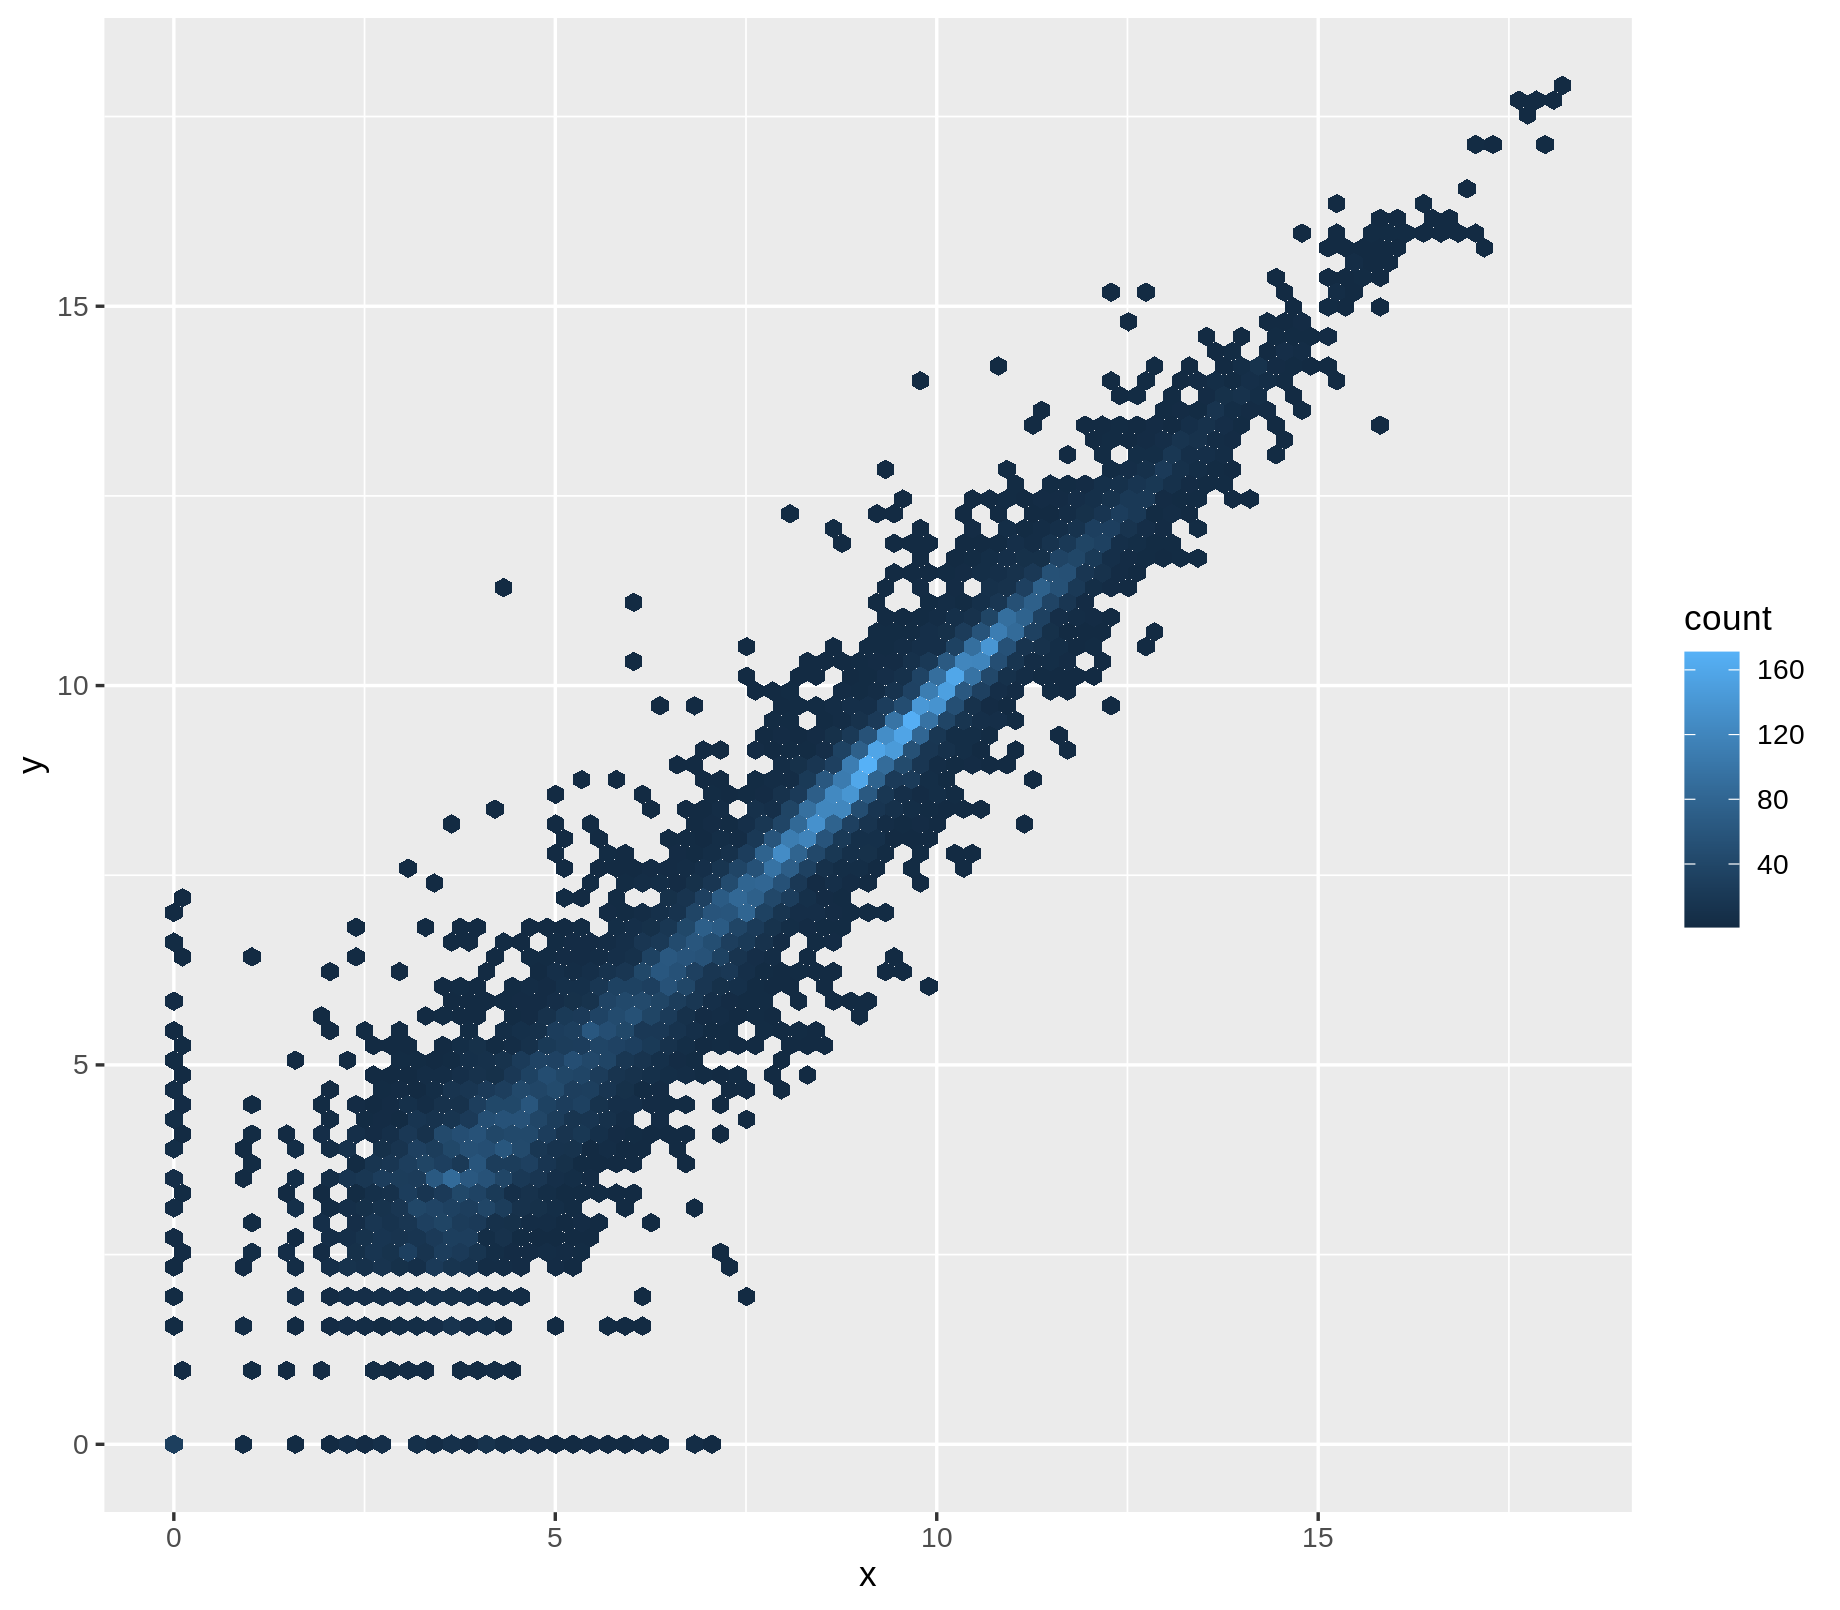

In [38]:
library("dplyr")
library("ggplot2")
df <- bind_rows(as_data_frame(log2(counts(dds, normalized=FALSE)[, 1:2]+1)))
colnames(df)[1:2] <- c("x", "y")  
ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80)

В качестве решения DESeq2 предлагает два преобразования для данных подсчета, которые стабилизируют дисперсию по среднему: преобразование стабилизации дисперсии (VST) для отрицательных биномиальных данных с трендом среднего дисперсии (Anders and Huber 2010), реализованное в функции vst, и преобразование регуляризованного логарифма или rlog (Love, Huber, and Anders 2014).
Для генов с большим количеством значений VST и rlog дадут результат, аналогичный обычному преобразованию log2 нормализованных счетчиков. Однако для генов с меньшим количеством значений значения уменьшаются до среднего значения. Данные, преобразованные с помощью VST или rlog, затем становятся приблизительно гомоскедастичными и могут использоваться непосредственно для вычисления расстояний между выборками, построения графиков PCA или в качестве входных данных для последующих методов, которые лучше всего работают с гомоскедастическими данными.
Какую трансформацию выбрать? VST вычисляется намного быстрее и менее чувствителен к большим выбросам, чем rlog. Rlog имеет тенденцию хорошо работать с небольшими наборами данных (n <30), потенциально превосходя VST, когда существует широкий диапазон глубины секвенирования по выборкам (разница на порядок). Поэтому мы рекомендуем VST для средних и больших наборов данных (n> 30). 

In [42]:
dds <- estimateSizeFactors(dds)
vsd <- vst(dds, blind = FALSE)
rld <- rlog(dds, blind = FALSE)

using 'avgTxLength' from assays(dds), correcting for library size



Вывод результатов экспрессии генов после функции VST и rlog. Сравните результаты с данными по dds:

In [43]:
head(assay(vsd), 10)
head(assay(rld), 10)
head(assays(dds)$abundance, 10)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,10.117676,9.679713,10.110929,9.790733,10.304881,10.124094,10.299539,9.848915
ENSG00000000419.14,9.696287,9.945921,9.826137,9.788733,9.772303,9.904924,9.693253,9.862460
ENSG00000000457.14,9.312182,9.156923,9.219013,9.308545,9.114515,9.247564,9.322854,9.310238
ENSG00000000460.17,8.452672,8.523623,8.205475,8.370304,8.474236,8.221597,8.527625,8.344547
ENSG00000000971.16,11.847406,12.206180,12.427434,12.680981,12.504753,12.986021,12.542683,13.118924
ENSG00000001036.14,11.377206,11.131311,11.332843,11.195618,11.066865,10.916873,11.369538,11.112368
ENSG00000001084.13,9.823505,9.530621,9.690808,10.013421,10.070483,9.776724,10.207396,10.066002
ENSG00000001167.15,9.609280,9.413061,9.690812,9.191717,10.017863,9.736592,9.678331,9.331612
ENSG00000001460.18,8.803425,8.912043,8.985672,8.859751,8.929862,8.777651,8.822487,8.888018
ENSG00000001461.17,11.273865,11.300315,12.195871,12.130181,11.396538,11.197260,11.597333,11.793818


,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,9.615608,9.116300,9.608488,9.247993,9.819026,9.623157,9.812092,9.313759
ENSG00000000419.14,9.073126,9.358636,9.223646,9.180829,9.161520,9.313555,9.069812,9.264936
ENSG00000000457.14,8.382939,8.186817,8.266074,8.377567,8.130060,8.302378,8.396009,8.380305
ENSG00000000460.17,6.436053,6.528122,6.090107,6.323665,6.466520,6.104044,6.536518,6.285898
ENSG00000000971.16,11.806447,12.145055,12.351525,12.586689,12.423449,12.868218,12.458677,12.990025
ENSG00000001036.14,11.155598,10.913612,11.112366,10.977264,10.849234,10.698094,11.148044,10.894760
ENSG00000001084.13,9.245879,8.898942,9.090046,9.459895,9.524124,9.191031,9.672050,9.518787
ENSG00000001167.15,8.890192,8.652844,8.986347,8.373107,9.356270,9.040062,8.971218,8.549781
ENSG00000001460.18,7.480199,7.626078,7.723613,7.557022,7.650309,7.443586,7.506567,7.594385
ENSG00000001461.17,11.120920,11.147182,12.005532,11.942804,11.241077,11.044630,11.436145,11.624678


,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003.15,17.868504,11.054294,16.437001,11.442150,19.771290,17.061442,21.815879,13.606522
ENSG00000000419.14,34.892738,42.995142,36.921551,33.946977,35.152610,40.962723,35.895818,40.931915
ENSG00000000457.14,5.719496,4.513575,4.728233,5.017930,4.155483,5.022255,5.992172,5.648252
ENSG00000000460.17,2.104607,2.314616,1.112925,1.559240,2.051491,1.198944,2.528832,1.659767
ENSG00000000971.16,61.392955,76.895422,87.670081,100.729032,93.346936,135.122672,106.465205,154.999168
ENSG00000001036.14,67.340304,52.950251,60.190391,51.461838,48.906473,44.108778,69.117901,53.916937
ENSG00000001084.13,13.747590,9.641202,11.092719,14.627034,16.310508,12.441335,20.567617,17.244353
ENSG00000001167.15,7.160682,5.502957,7.230890,3.889460,10.095551,7.773137,7.963451,5.173798
ENSG00000001460.18,4.000052,4.502690,4.846361,3.853038,4.504803,3.654828,4.265440,4.489864
ENSG00000001461.17,25.334031,24.744607,47.563938,43.202620,25.979754,22.614431,33.702901,37.546010


### Задание № 3:

1) Чем отличаются массивы данных dds от vst и rlog?
2) Как изменилось среднее число ридов на один ген в dds массиве?
3) Постройте графики методом главных компонент для преобразованных данных методами VST и rlog. (https://rpubs.com/AllaT/rprog-ggplot2)
4) Оцените различия полученных графиков и кратко опишите результат

**Ответы:**

1) Что делают vst и rlog - понятно и написано выше в задании. Давайте оценим таблички методом пристального взгляда. Видно, что данные в таблицах vst и rlog стали более близки друг к другу по значениям, как в одной строке, так и между строками - если в третьей таблице еще были значения вроде 61 и 7, то в первой и второй табличке уже все данные приблизительно сосредоточены в районе 8-11 +- eps. Таким образом, данные стали более гомоскедастичными.

2) Не изменилось, т.к. counts в dds мы не трогали.

In [44]:
mean(rowMeans(assays(dds)$counts))-mean(rowMeans(assays(gse)$counts))

[1] 899.274

3) Построим сначала график для vst:

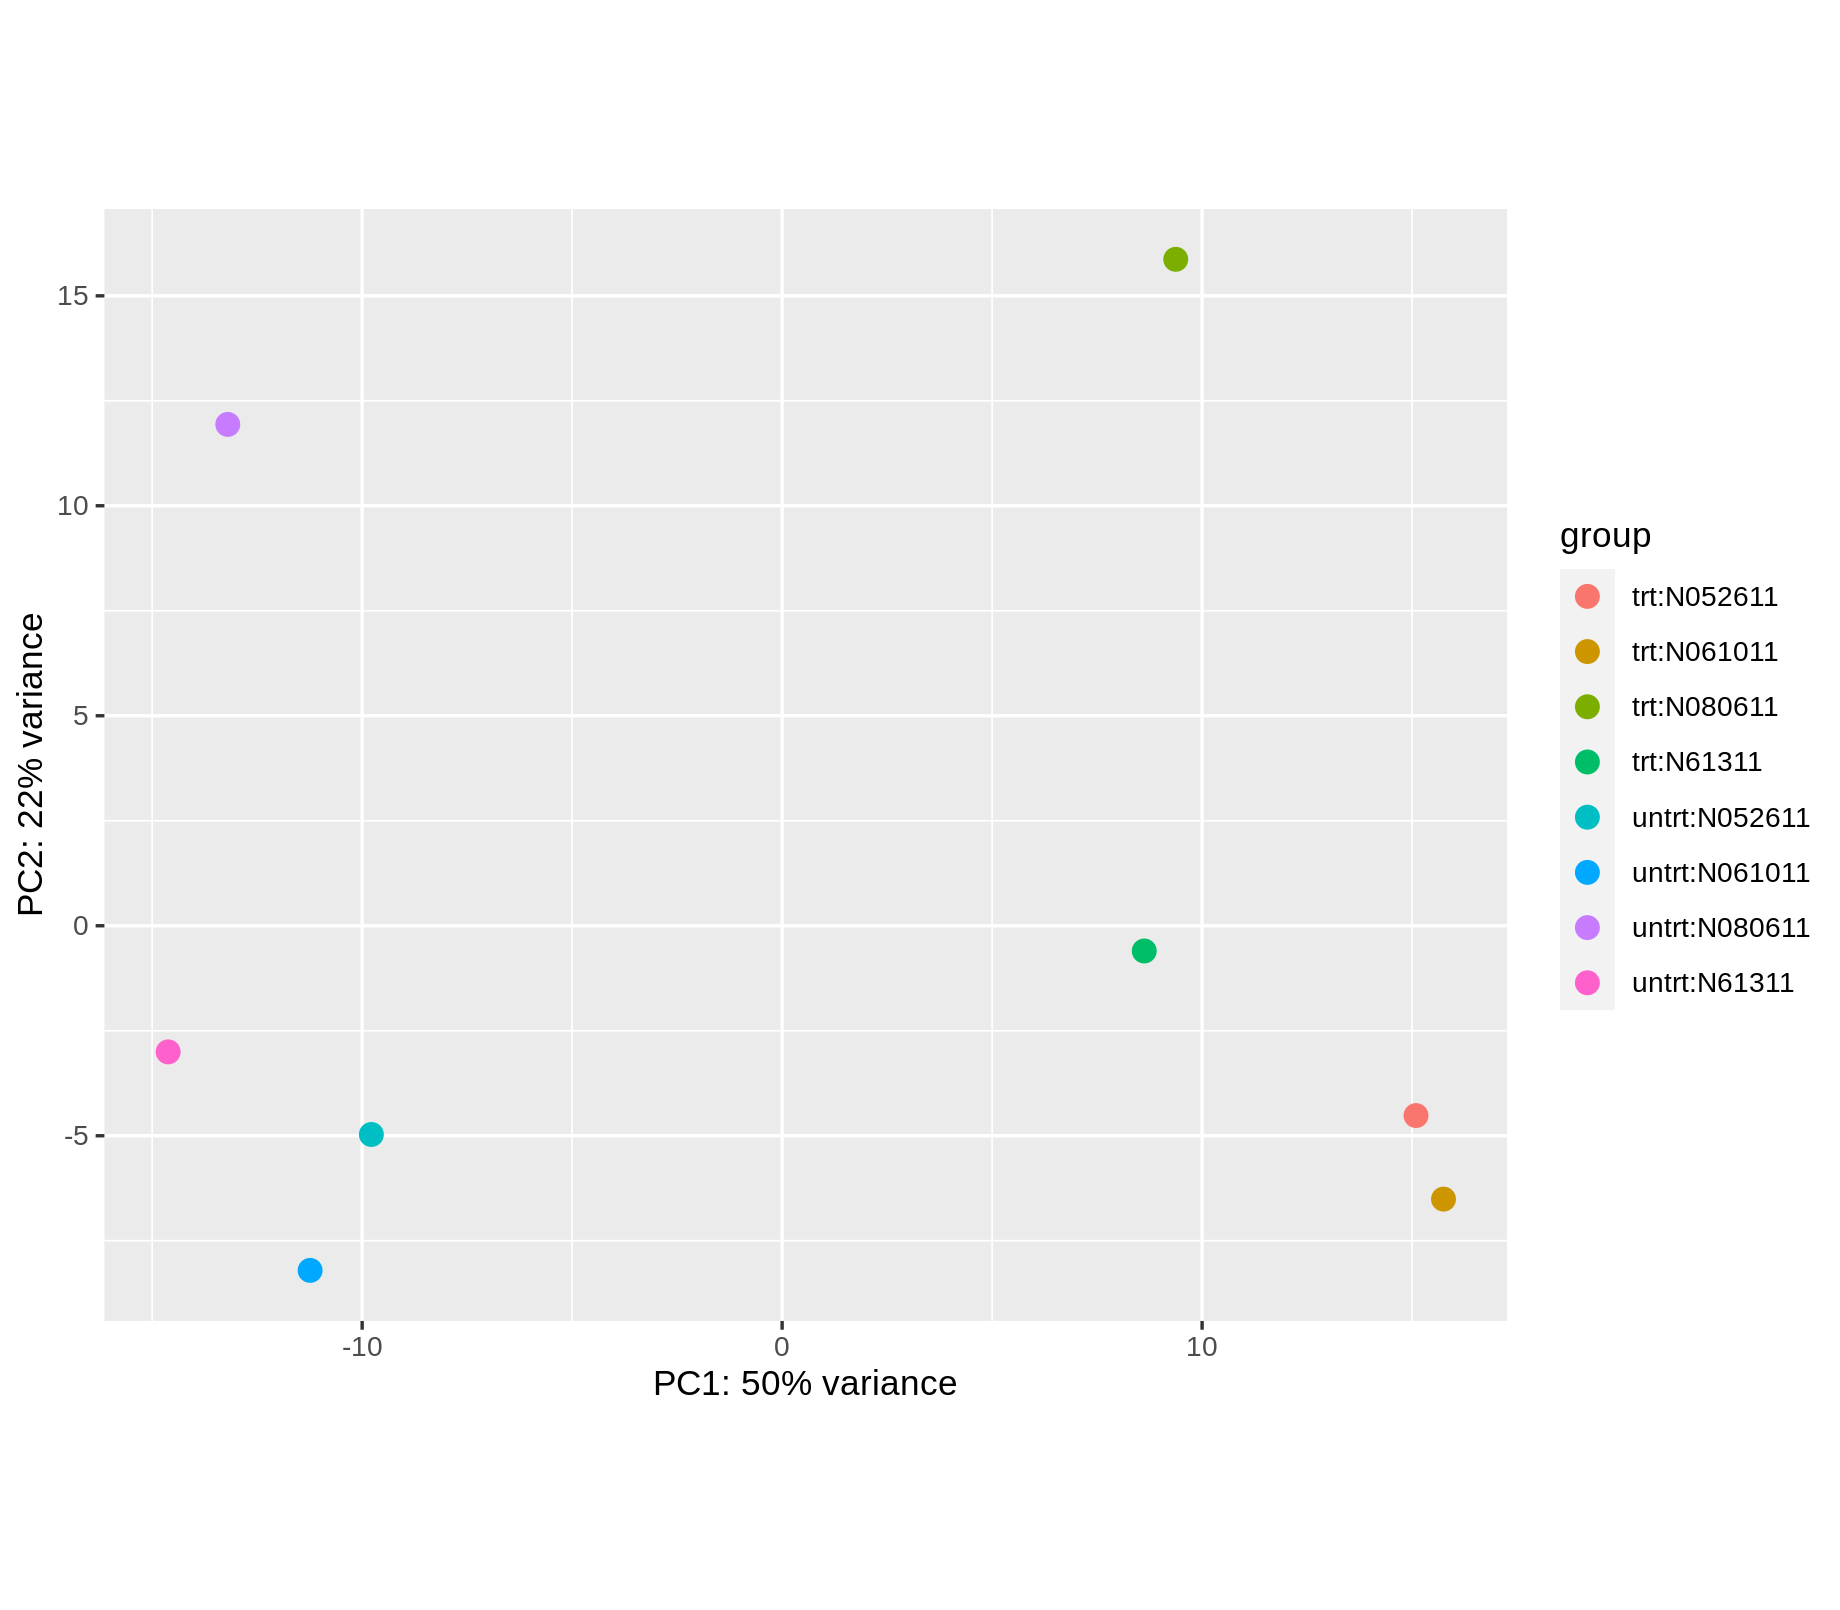

In [47]:
plotPCA(vsd, intgroup=c('dex','cell'))

А теперь для rlog:

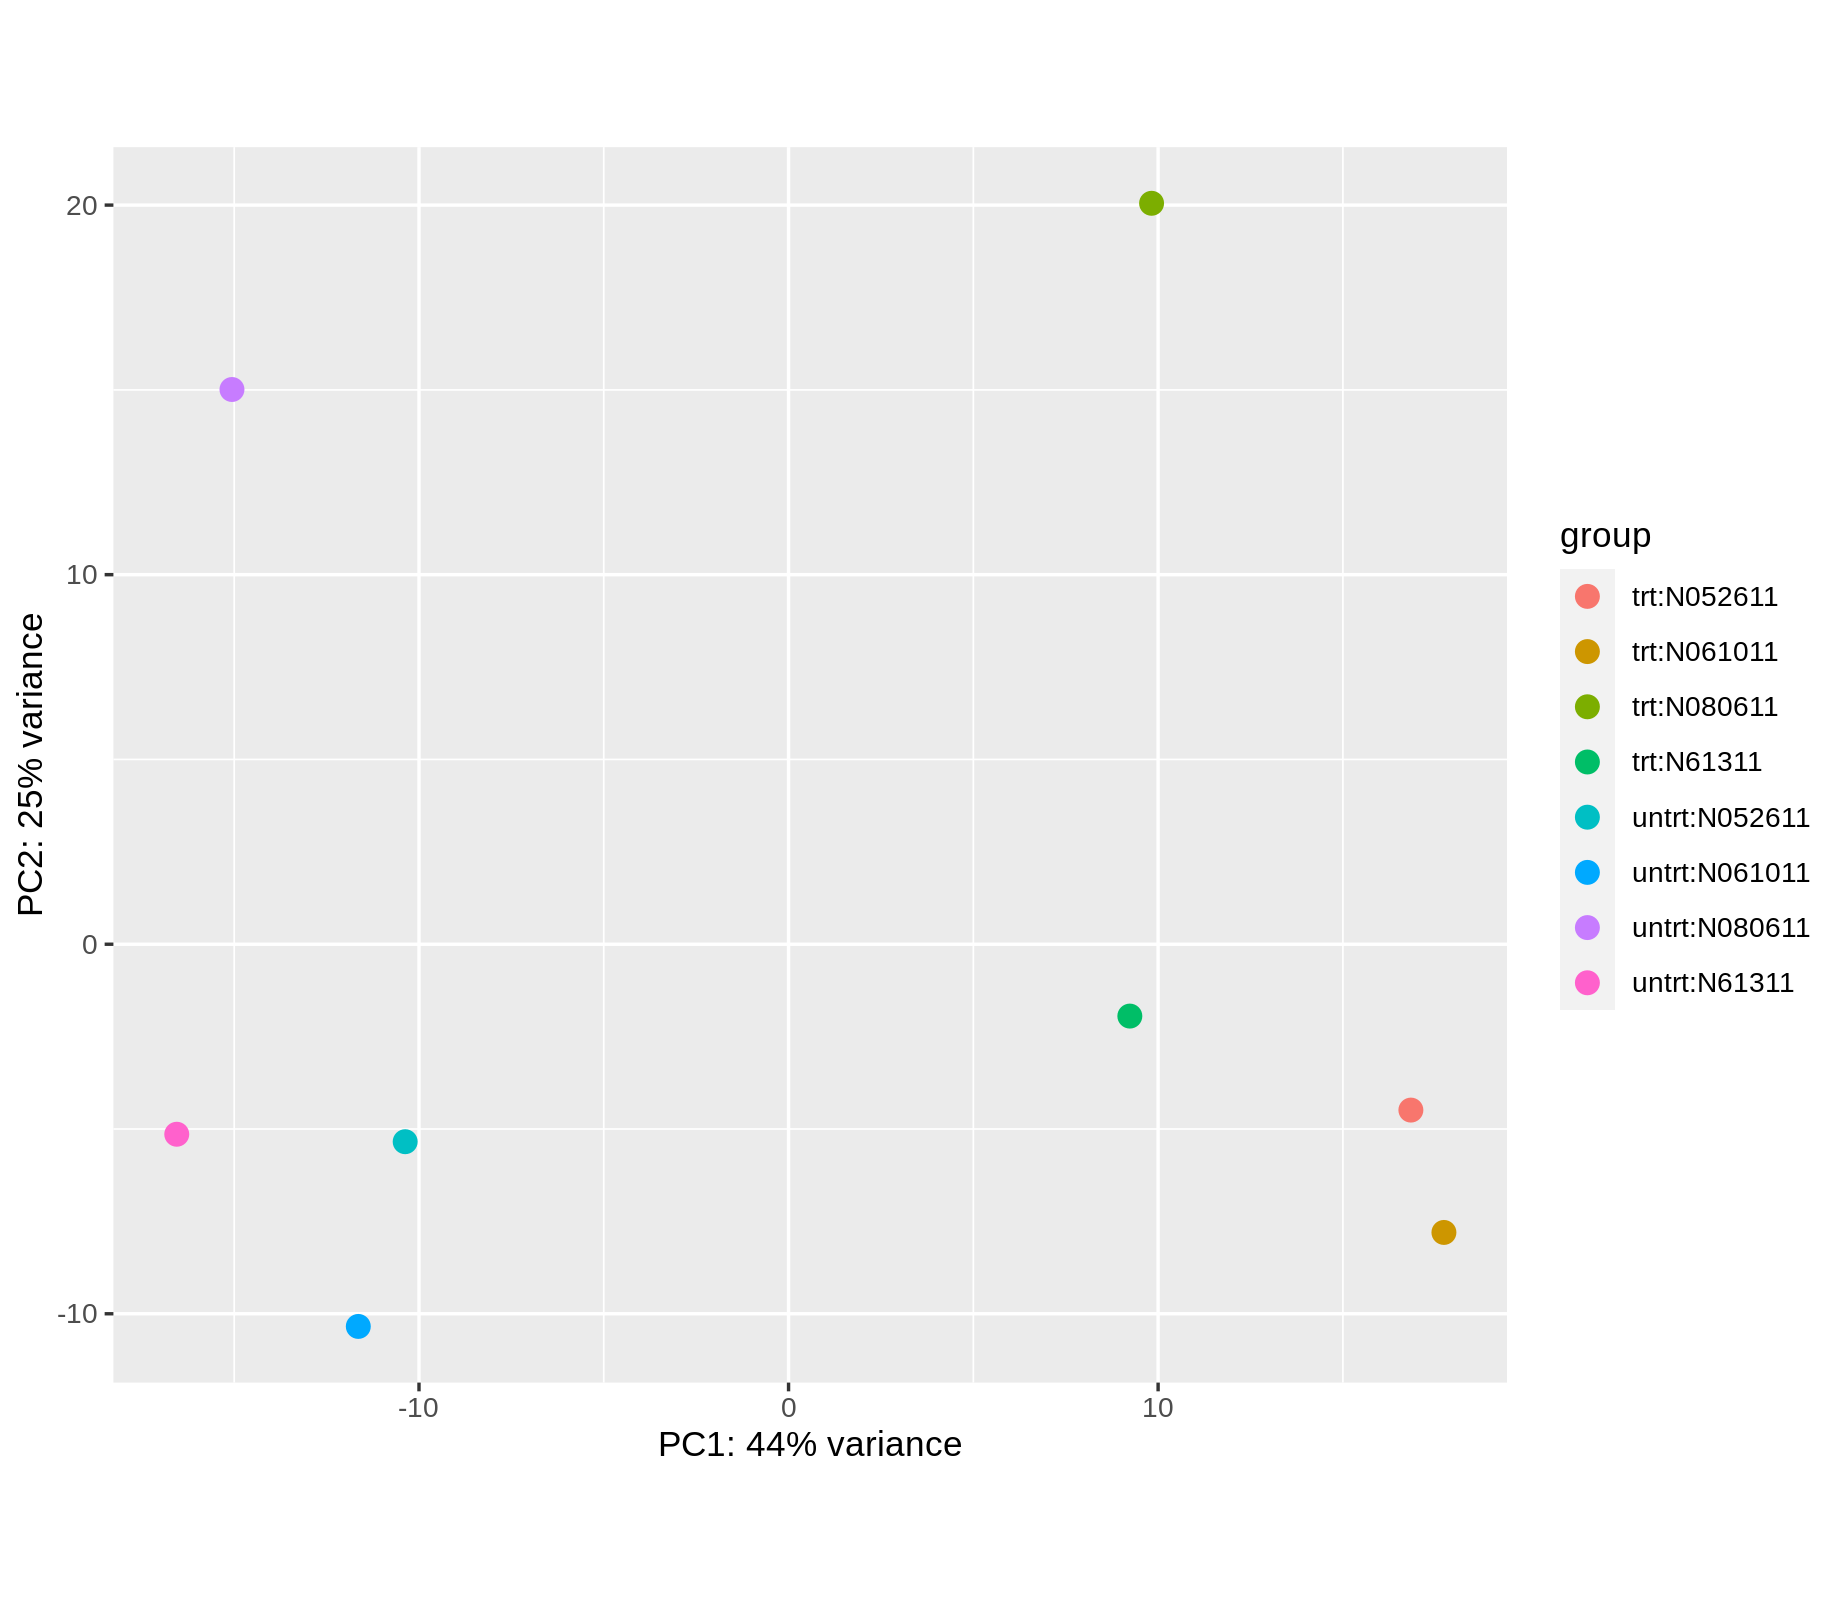

In [49]:
plotPCA(rld, intgroup=c('dex','cell'))

4) Сравним полученные графики:

Для начала заметим, что оба графика показывают кластеризацию образцов, получавших лечение (trt) и не получавших (untrt) - два больших кластера слева внизу и справа внизу. То есть в целом результат хорош, НО: заметим, что на rld выбросы сильнее, т.е. фиолетовая и зеленая точка сильнее "улетели" от кластеров, что в общем-то логично, ведь мы знаем, что "VST ... менее чувствителен к большим выбросам, чем rlog". С другой стороны, на vst данные внутри кластеров более близки друг к другу. В общем, на нашем датасете и vst, и rld имеют как преимущества, так и недостатки.

---

## 2.5. Расчет дистанций между образцами

Важным шагом в оценке дифференциальной экспрессии служит установление сходства между образцами. <br/>Какие образцы в выборке похожи друг на друга, какие отличаются? <br/>Соответствует ли это ожиданиям от плана эксперимента?<br/>
Для расчета евклидова расстояния между выборками используется функция R dist. Для того чтобы каждый ген внес равный вклад в евклидовы расстояния, используем массив VST.

In [50]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516 SRR1039517
SRR1039509   40.06927                                                       
SRR1039512   32.35974   46.20335                                            
SRR1039513   52.59147   37.46813   42.56331                                 
SRR1039516   36.20889   49.10954   35.33437   53.74288                      
SRR1039517   53.06728   42.66291   48.47602   41.64120   40.76102           
SRR1039520   32.35800   48.09155   29.99176   49.21122   37.74544   52.05273
SRR1039521   53.08648   37.83254   48.50016   31.08158   54.72375   42.50032
           SRR1039520
SRR1039509           
SRR1039512           
SRR1039513           
SRR1039516           
SRR1039517           
SRR1039520           
SRR1039521   44.24935

На основании полученных дистанций возможно построить тепловую матрицу, используя в качестве названий номера образцов и их обработку дексаметазоном

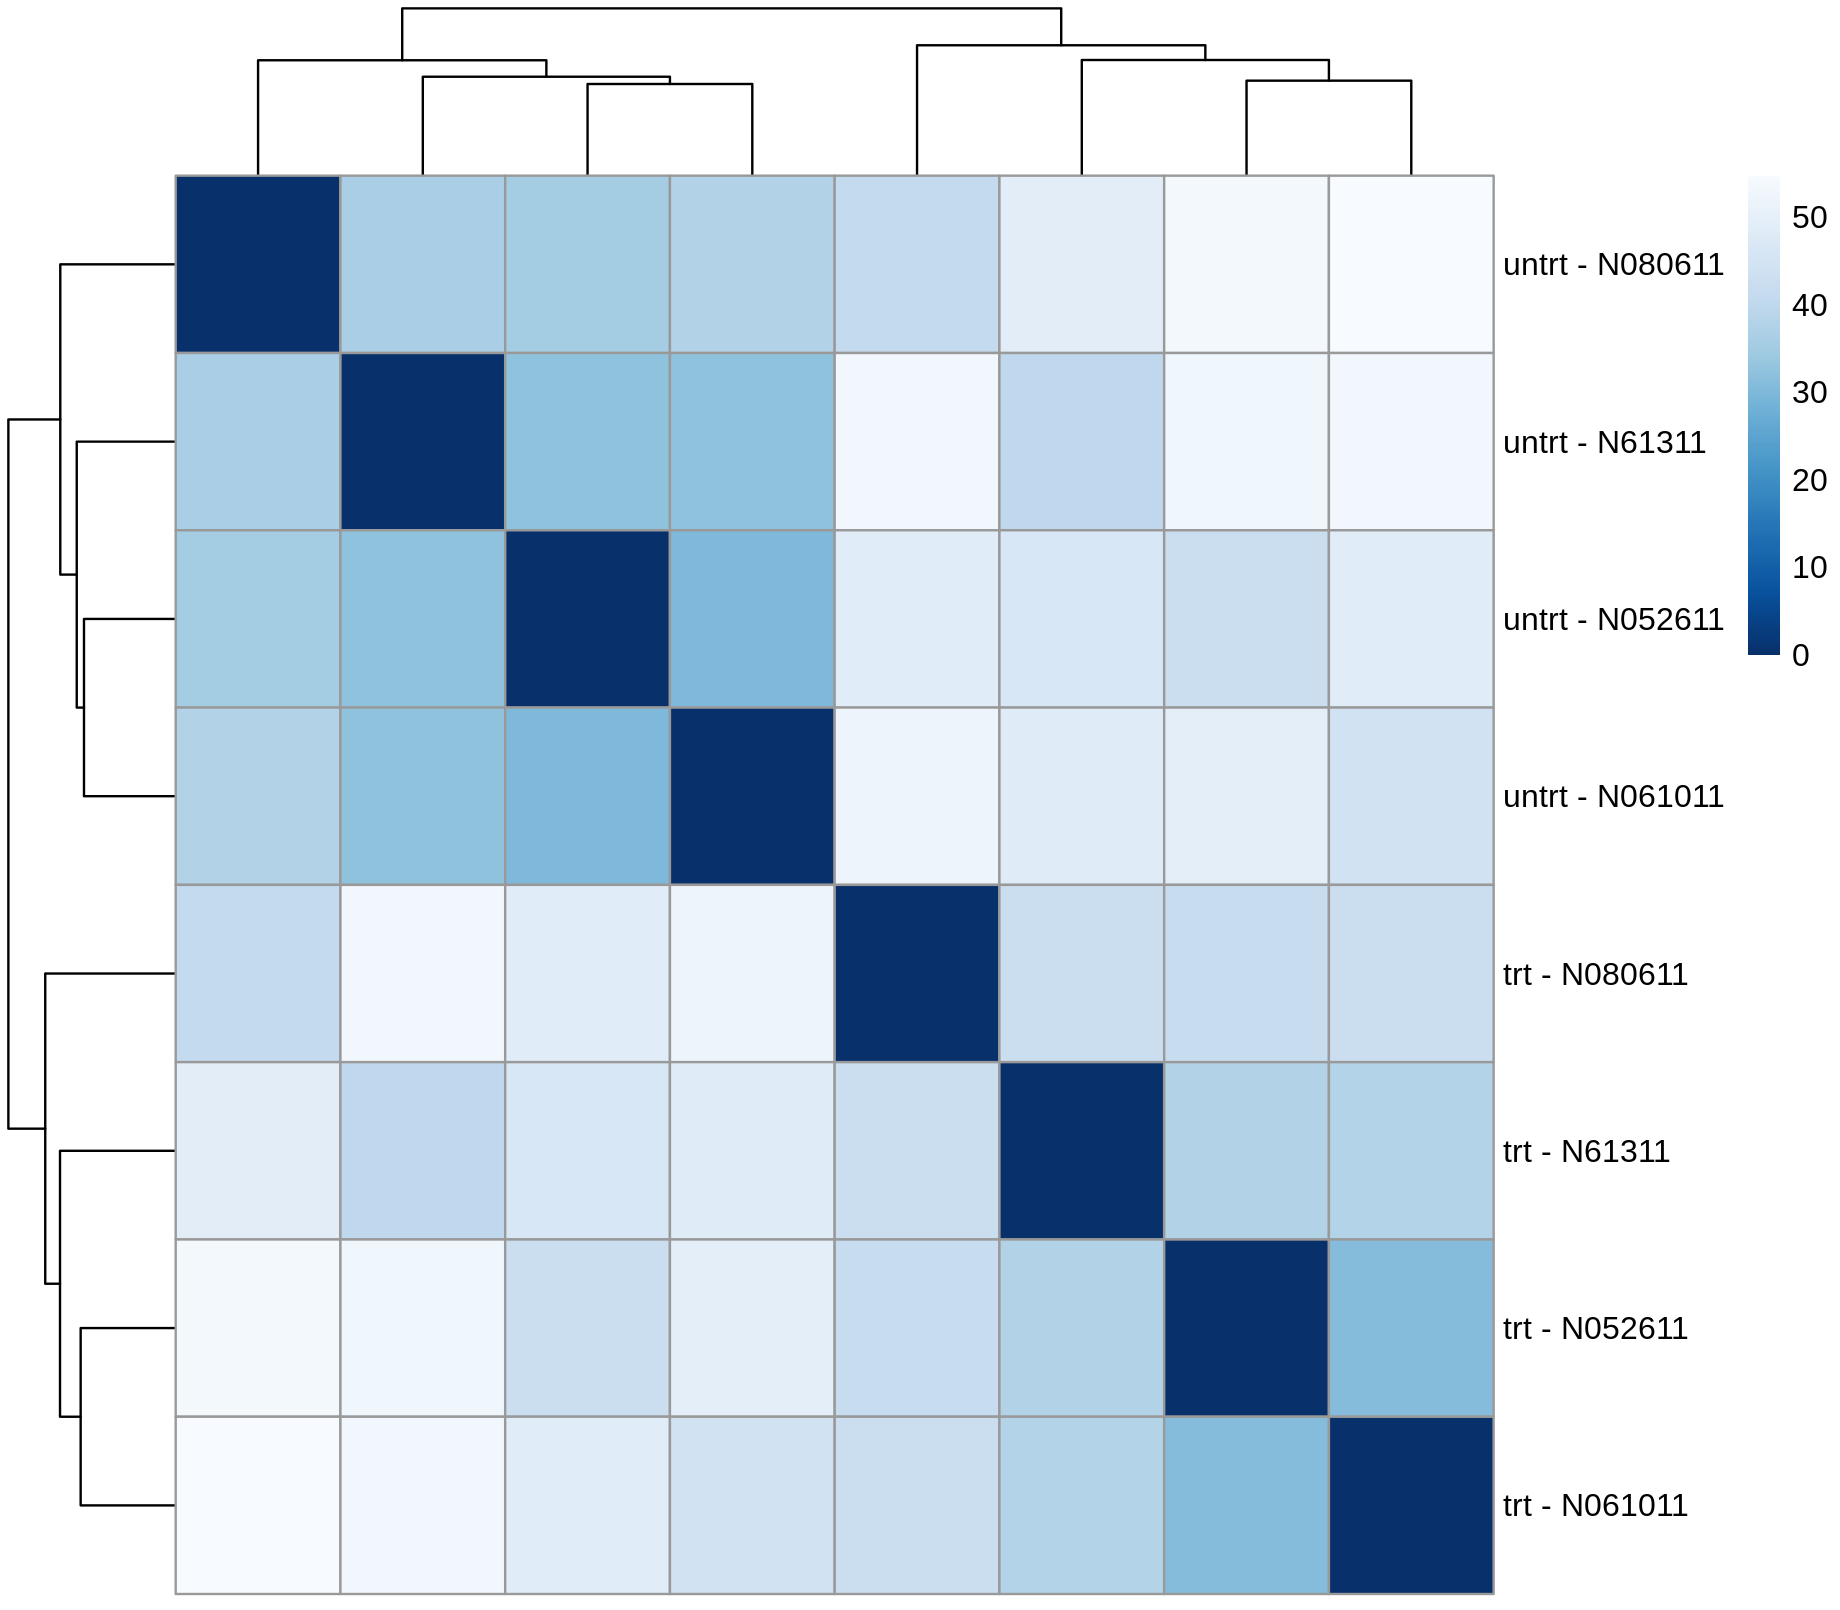

In [51]:
library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$dex, vsd$cell, sep = " - ")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

Возможно также построить график с использованием метода главных компонент

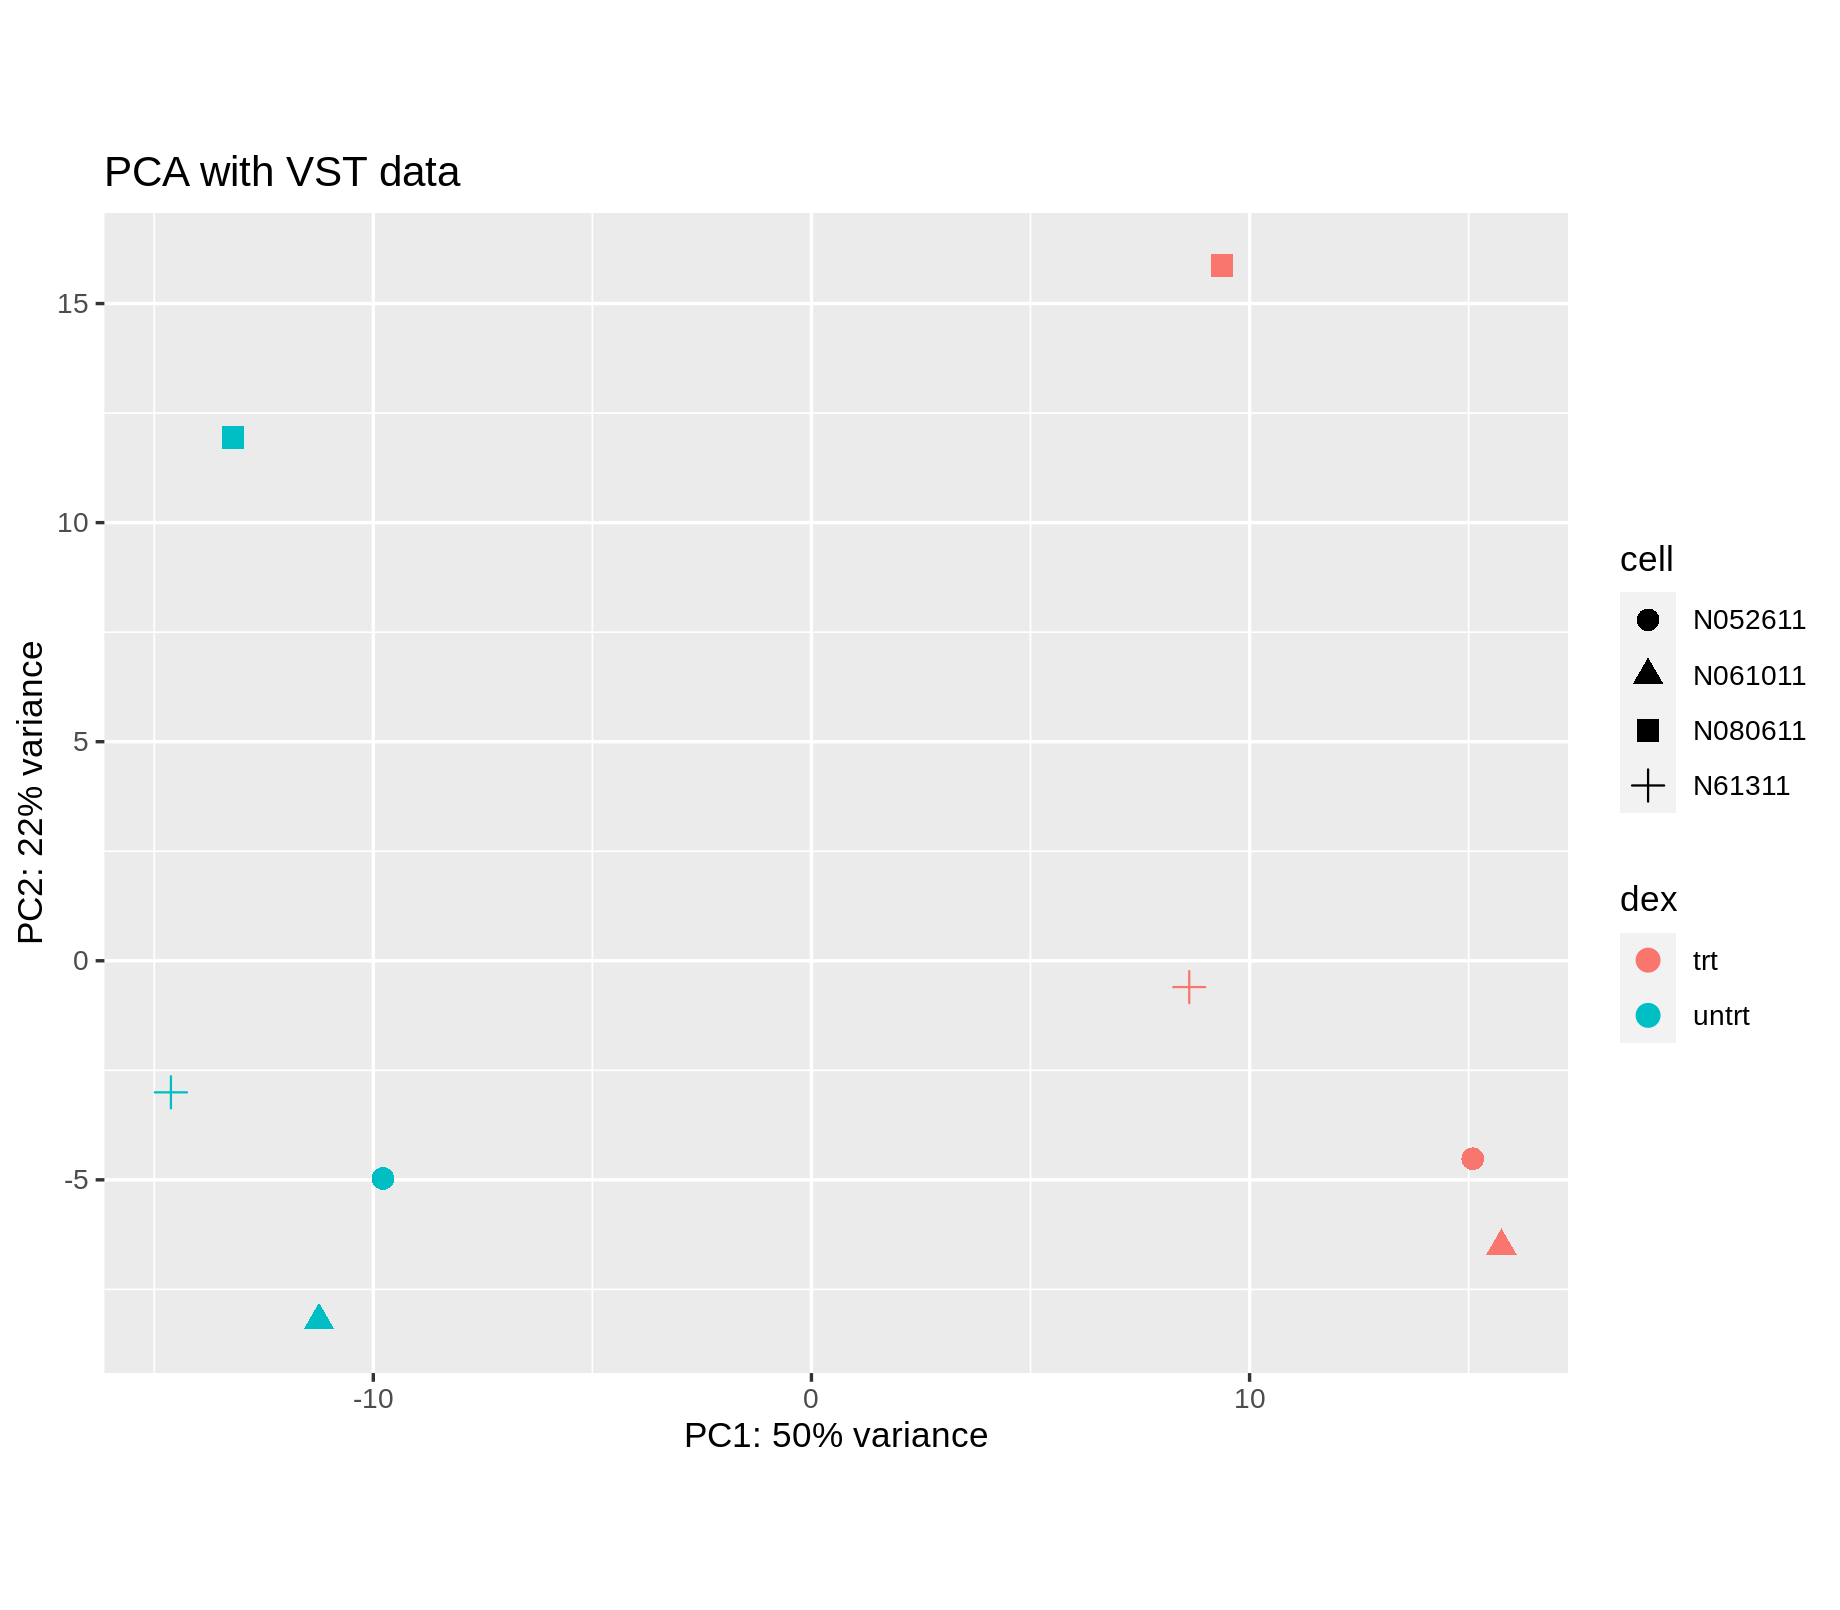

In [52]:
library("ggplot2")
pcaData <- plotPCA(vsd, intgroup = c("dex", "cell"), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(x = PC1, y = PC2, color = dex, shape = cell)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed() +
  ggtitle("PCA with VST data")

### Задание № 4:

1) Оцените неравномерность образцов, используемых в анализе. 
2) Напишите значение евклидового расстояния между обработанным дексаметазолом образцом cell N080611 и необработанным N61311

**Ответы:**

1) Клеточные линии-квадратики N080611 несколько отстоят от остальных клеточных линий, сбившихся в 2 кластера (обработанные и необработанные), т.е. представляют собой некоторый шум.

2) Сначала посмотрим на всю табличку и найдем требуемое расстояние, оно находится на [6][1] элементе таблички:

In [53]:
sampleDistMatrix

untrt - N61311,0.00000,40.06927,32.35974,52.59147,36.20889,53.06728,32.35800,53.08648
trt - N61311,40.06927,0.00000,46.20335,37.46813,49.10954,42.66291,48.09155,37.83254
untrt - N052611,32.35974,46.20335,0.00000,42.56331,35.33437,48.47602,29.99176,48.50016
trt - N052611,52.59147,37.46813,42.56331,0.00000,53.74288,41.64120,49.21122,31.08158
untrt - N080611,36.20889,49.10954,35.33437,53.74288,0.00000,40.76102,37.74544,54.72375
trt - N080611,53.06728,42.66291,48.47602,41.64120,40.76102,0.00000,52.05273,42.50032
untrt - N061011,32.35800,48.09155,29.99176,49.21122,37.74544,52.05273,0.00000,44.24935
trt - N061011,53.08648,37.83254,48.50016,31.08158,54.72375,42.50032,44.24935,0.00000


In [54]:
sampleDistMatrix[6][1]

[1] 53.06728